# Modeling the ARIMA Model

In [2]:
#General Time Series Plot 

week_start_date
32993    4
33000    5
33007    4
33014    3
33021    6
Name: total_cases, dtype: int64


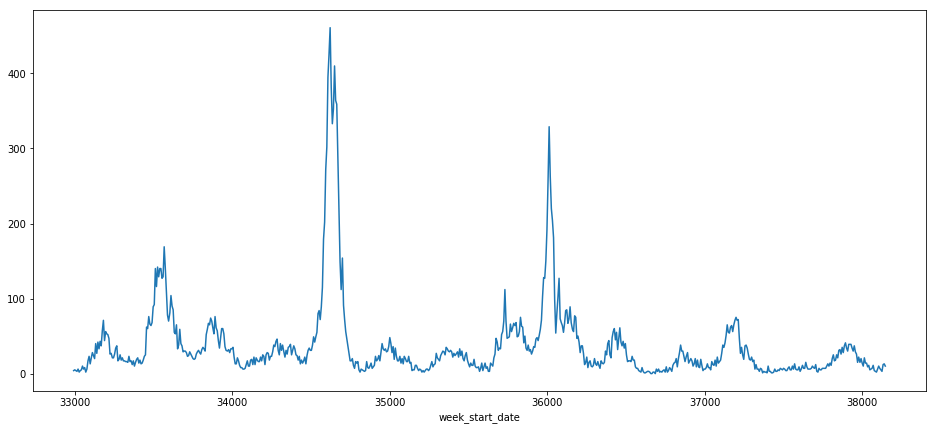

In [10]:
# Importinng libraries and packages
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
import numpy as np
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

 
def parser(x):
	return datetime.strptime(x, '%Y-%m')

# reading time series data and fit to data frame
series = read_csv('SJ_ARIMA_Train.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

# Ploting the time series plot
# variable => total_cases ,data type: int64
pyplot.figure(figsize=(16,7))
series.plot()
pyplot.show()


# Autocorrelation Plot

C:\Users\gihan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


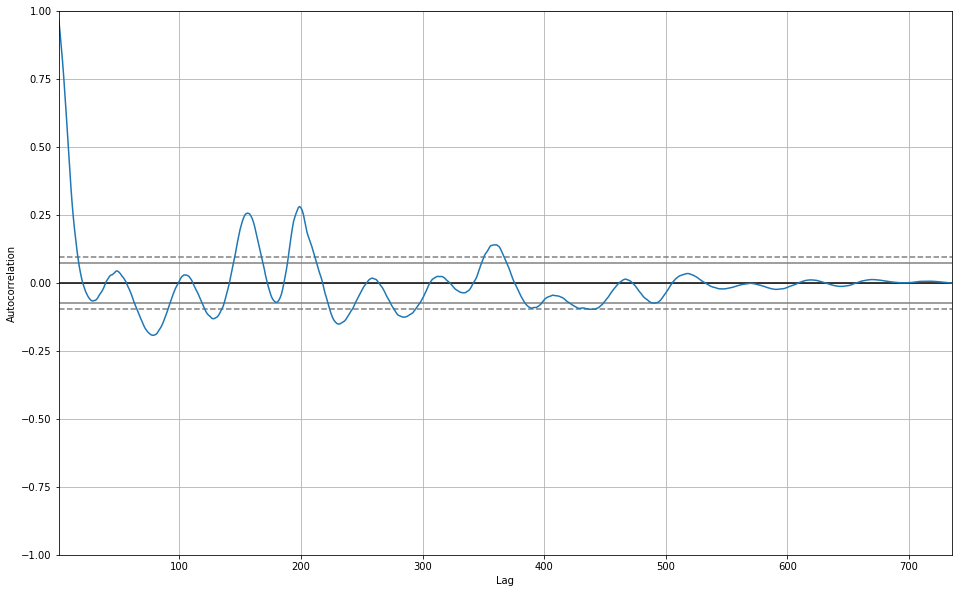

In [5]:
def parser(x):
	return datetime.strptime(x, '%Y-%m')
 
series = read_csv('SJ_ARIMA_Train.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
pyplot.figure(figsize=(16,10))
autocorrelation_plot(series)
pyplot.show()

In [8]:
# Auto correlation plot converges to zero

# ARIMA Model Results and Residuals Plot

C:\Users\gihan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\gihan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.total_cases   No. Observations:                  734
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2974.545
Method:                       css-mle   S.D. of innovations             13.923
Date:                Tue, 31 Jul 2018   AIC                           5961.090
Time:                        19:52:22   BIC                           5988.681
Sample:                             1   HQIC                          5971.732
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0077      0.656      0.012      0.991      -1.279       1.294
ar.L1.D.total_cases    -0.6171      0.198     -3.111      0.002      -1.006      -0.228
ar.L2.D.total_ca

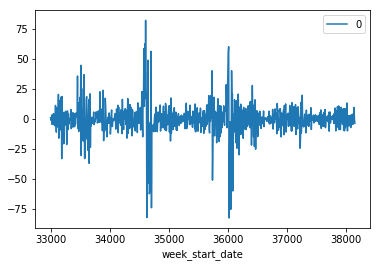

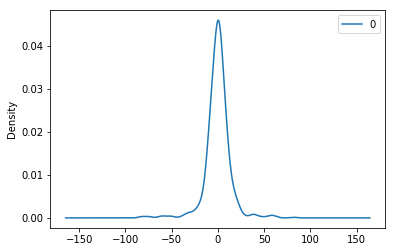

                0
count  734.000000
mean    -0.000779
std     13.932206
min    -82.405288
25%     -5.271873
50%      0.308725
75%      5.611603
max     82.048684


In [6]:
dataset = read_csv('SJ_ARIMA_Train.csv',header=0,squeeze=True,parse_dates=['week_start_date'], index_col=0)
dataset.head()

# fit model
dataset = dataset.astype('float32')
model = ARIMA(dataset, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Predictions and Prediction Plot

predicted=46.997507, expected=25.000000
predicted=24.575642, expected=21.000000
predicted=21.984955, expected=48.000000
predicted=53.148169, expected=56.000000
predicted=58.974224, expected=60.000000
predicted=62.395611, expected=45.000000
predicted=44.369069, expected=55.000000
predicted=57.233307, expected=32.000000
predicted=29.600564, expected=46.000000
predicted=48.066140, expected=61.000000
predicted=63.463932, expected=42.000000
predicted=40.184804, expected=37.000000
predicted=36.523834, expected=43.000000
predicted=43.812982, expected=34.000000
predicted=33.003920, expected=40.000000
predicted=40.910204, expected=25.000000
predicted=23.312378, expected=16.000000
predicted=14.919708, expected=17.000000
predicted=17.258584, expected=17.000000
predicted=17.466225, expected=16.000000
predicted=16.640743, expected=23.000000
predicted=24.927384, expected=18.000000
predicted=18.658378, expected=18.000000
predicted=19.342083, expected=9.000000
predicted=9.232908, expected=7.000000
pre

predicted=26.681337, expected=35.000000
predicted=37.181158, expected=28.000000
predicted=28.343878, expected=37.000000
predicted=38.965893, expected=41.000000
predicted=42.486373, expected=34.000000
predicted=34.098479, expected=30.000000
predicted=30.090880, expected=39.000000
predicted=40.481134, expected=39.000000
predicted=39.600220, expected=39.000000
predicted=39.506011, expected=34.000000
predicted=33.785185, expected=30.000000
predicted=29.702234, expected=37.000000
predicted=37.933333, expected=29.000000
predicted=28.347127, expected=26.000000
predicted=25.746608, expected=15.000000
predicted=13.766042, expected=22.000000
predicted=22.803581, expected=15.000000
predicted=14.534427, expected=20.000000
predicted=20.959804, expected=14.000000
predicted=13.951101, expected=10.000000
predicted=10.159789, expected=21.000000
predicted=23.000639, expected=14.000000
predicted=14.320448, expected=14.000000
predicted=15.007670, expected=9.000000
predicted=9.485474, expected=11.000000
pr

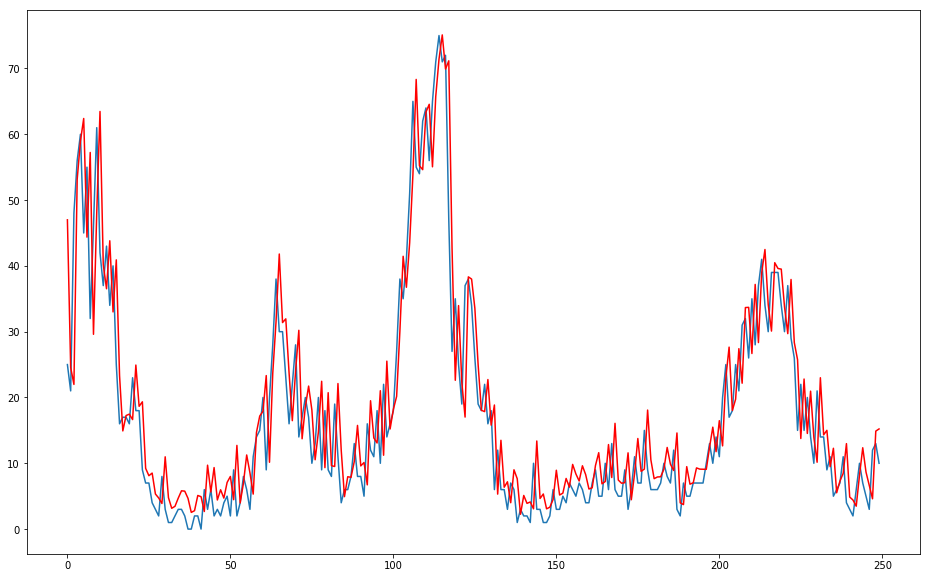

In [7]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime(x, '%Y-%m')
 
series = read_csv('SJ_ARIMA_Train.csv', header=0, parse_dates=['week_start_date'], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,2))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.figure(figsize=(16,10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
 

In [37]:
#MSE Value of the Prediction
#Test MSE: 50.711


# Correlation Matrix


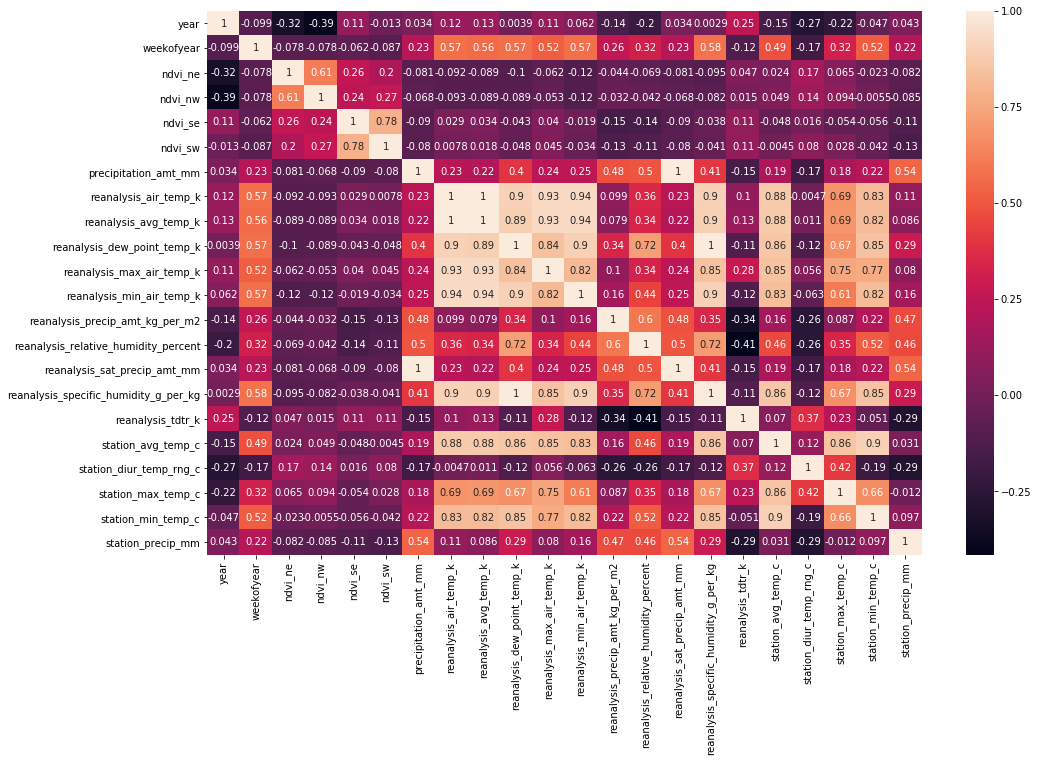

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('SJ_Train.csv', parse_dates=[3])
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
#set annot = False in order to plot without correlation values
plt.show()

In [9]:
# In the correlation matrix multicolinearity can be identified for some features, (cells with lighter
#color and cells with darker color)
# It's better to omit those variables in order to do correct predictions